Task 1) Create a data frame that contains the following information for each drug: unique
drug identifier in the DrugBank database, name of the drug, its type, description, form in which the drug is given
occurs, indications, mechanism of action and information with which foods the drug is eaten
interacts. \
Solution: There can be many drugbank-id's so we will take the one that is marked as primary.

In [1]:
!pip install pandas
!pip install xmltodict

In [3]:
import pandas as pd
import xmltodict

file_path = "drugbank_partial.xml"

with open(file_path, "r", encoding="utf-8") as file:
    data_dict = xmltodict.parse(file.read())

drugs = data_dict["drugbank"]["drug"]

def get_id(drug):
    drug_id = None
    if isinstance(drug['drugbank-id'], list):
        for item in drug['drugbank-id']:
            if isinstance(item, dict) and item.get('@primary') == 'true':
                drug_id = item.get('#text')
                break
    elif isinstance(drug['drugbank-id'], dict):
        if drug['drugbank-id'].get('@primary') == 'true':
            drug_id = drug['drugbank-id'].get('#text')
    return drug_id

def get_name(drug):
    return drug.get("name")

def get_type(drug):
    return drug.get("@type")

def get_description(drug):
    return drug.get("description")

def get_dosage_form(drug):
    return drug.get("state")

def get_indication(drug):
    return drug.get("indication")

def get_mechanism_of_action(drug):
    return drug.get("mechanism-of-action")

def get_food_interactions(drug):
    interactions = []
    if not drug.get("food-interactions"):
        return interactions
    for interaction in drug.get("food-interactions").values():
        interactions.append(interaction)
    return interactions

def find_data():
    records = []
    for drug in drugs:
        record = {
            "DrugBank ID": get_id(drug),
            "Name": get_name(drug),
            "Type": get_type(drug),
            "Description": get_description(drug),
            "Dosage Form": get_dosage_form(drug),
            "Indication": get_indication(drug),
            "Mechanism of Action": get_mechanism_of_action(drug),
            "Food Interactions": get_food_interactions(drug)
        }
        records.append(record)
    return records

filtered_df = pd.DataFrame(find_data())

print(filtered_df)


   DrugBank ID                 Name            Type  \
0      DB00001            Lepirudin         biotech   
1      DB00002            Cetuximab         biotech   
2      DB00003         Dornase alfa         biotech   
3      DB00004  Denileukin diftitox         biotech   
4      DB00005           Etanercept         biotech   
..         ...                  ...             ...   
95     DB00104           Octreotide         biotech   
96     DB00105   Interferon alfa-2b         biotech   
97     DB00106             Abarelix  small molecule   
98     DB00107             Oxytocin         biotech   
99     DB00108          Natalizumab         biotech   

                                          Description Dosage Form  \
0   Lepirudin is a recombinant hirudin formed by 6...       solid   
1   Cetuximab is a recombinant chimeric human/mous...      liquid   
2   Dornase alfa is a biosynthetic form of human d...      liquid   
3   A recombinant DNA-derived cytotoxic protein co...      liqu

Task 2) Create a data frame that allows you to search for information about DrugBank ID
all synonyms under which a given drug appears. Write a function that for the given
DrugBank ID will create and draw a synonym graph using the NetworkX library. You should
ensure the readability of the generated drawing. \
Solution: The selected drug will be in the middle of the graph and its synonyms will be connected to it.

In [12]:
!pip install networkx
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.7 MB/s eta 0:00:00


Synonyms DataFrame:
   DrugBank ID                                           Synonyms
0      DB00001  [[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru...
1      DB00002                [Cetuximab, Cétuximab, Cetuximabum]
2      DB00003  [Deoxyribonuclease (human clone 18-1 protein m...
3      DB00004  [Denileukin, Denileukin diftitox, Interleukin-...
4      DB00005  [Etanercept, etanercept-szzs, etanercept-ykro,...
..         ...                                                ...
95     DB00104   [Octreotida, Octreotide, Octreotidum, Octrotide]
96     DB00105  [Interferon alfa-2b, Interferon alfa-2b (recom...
97     DB00106                                         [Abarelix]
98     DB00107                              [Oxitocina, Oxytocin]
99     DB00108  [Anti-alpha4 integrin, Anti-VLA4, IMMUNOGLOBUL...

[100 rows x 2 columns]


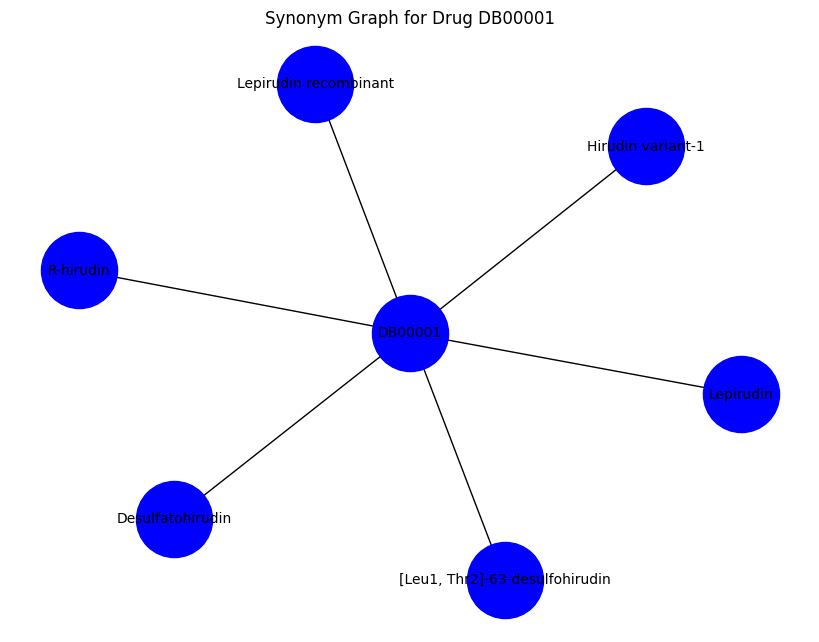

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

def get_synonyms(drug):
    synonyms = []
    if "synonyms" in drug and drug["synonyms"]:
        syn_data = drug["synonyms"]
        if "synonym" in syn_data:
            syns = syn_data["synonym"]
            if isinstance(syns, list):
                for syn in syns:
                    if isinstance(syn, dict):
                        text = syn.get("#text", "").strip()
                        if text:
                            synonyms.append(text)
                    elif isinstance(syn, str):
                        synonyms.append(syn.strip())
            elif isinstance(syns, dict):
                text = syns.get("#text", "").strip()
                if text:
                    synonyms.append(text)
            elif isinstance(syns, str):
                synonyms.append(syns.strip())
    return synonyms

def create_synonyms_df():
    records = []
    for drug in drugs:
        drug_id = get_id(drug)
        syns = get_synonyms(drug)
        records.append({"DrugBank ID": drug_id, "Synonyms": syns})
    return pd.DataFrame(records)


# Create the DataFrame of synonyms
synonyms_df = create_synonyms_df()
print("Synonyms DataFrame:")
print(synonyms_df)

def draw_synonym_graph(drugbank_id, synonyms_df):
    record = synonyms_df[synonyms_df["DrugBank ID"] == drugbank_id]
    if record.empty:
        print(f"No drug found with ID {drugbank_id}")
        return
    synonyms = record.iloc[0]["Synonyms"]

    G = nx.Graph()
    G.add_node(drugbank_id)
    for syn in synonyms:
        G.add_node(syn)
        G.add_edge(drugbank_id, syn)

    pos = nx.spring_layout(G)   # Creates the star-like layout
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="blue", node_size=3000, font_size=10)
    plt.title(f"Synonym Graph for Drug {drugbank_id}")
    plt.show()

draw_synonym_graph("DB00001", synonyms_df)